In [2]:
#playtennis example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("play_tennis.csv")  # Replace with your actual file
df.head()
df.tail()

,Outlook,Temperature,Humidity,Wind,PlayTennis
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


In [4]:
# Create a copy of the dataset
df_encoded = df.copy()

# Encode all categorical columns
le = LabelEncoder()
for column in df_encoded.columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

print(df_encoded)

    Outlook  Temperature  Humidity  Wind  PlayTennis
0         2            1         0     1           0
1         2            1         0     0           0
2         0            1         0     1           1
3         1            2         0     1           1
4         1            0         1     1           1
5         1            0         1     0           0
6         0            0         1     0           1
7         2            2         0     1           0
8         2            0         1     1           1
9         1            2         1     1           1
10        2            2         1     0           1
11        0            2         0     0           1
12        0            1         1     1           1
13        1            2         0     0           0


In [5]:
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

In [6]:
# Initialize and train model
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

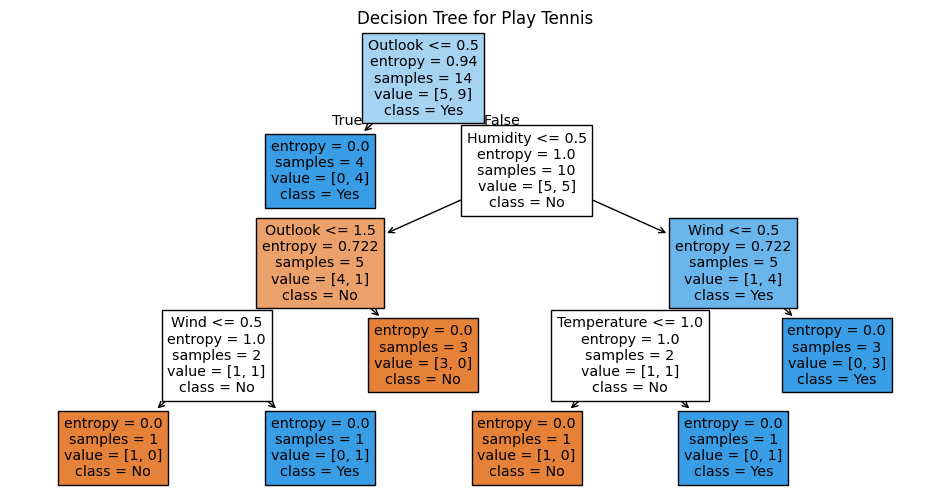

In [7]:
# Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Play Tennis")
plt.show()



In [8]:
y_pred = model.predict(X)
print("Predictions:", y_pred)

Predictions: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Accuracy: 1.0
[[5 0]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [10]:
#Iris_Gini_Decision tree

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data,
iris.target, test_size=0.3, random_state=0)

In [11]:
# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# Make predictions on the testing data
y_pred = dtc.predict(X_test)

In [13]:
# Calculate the accuracy of the classifier
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


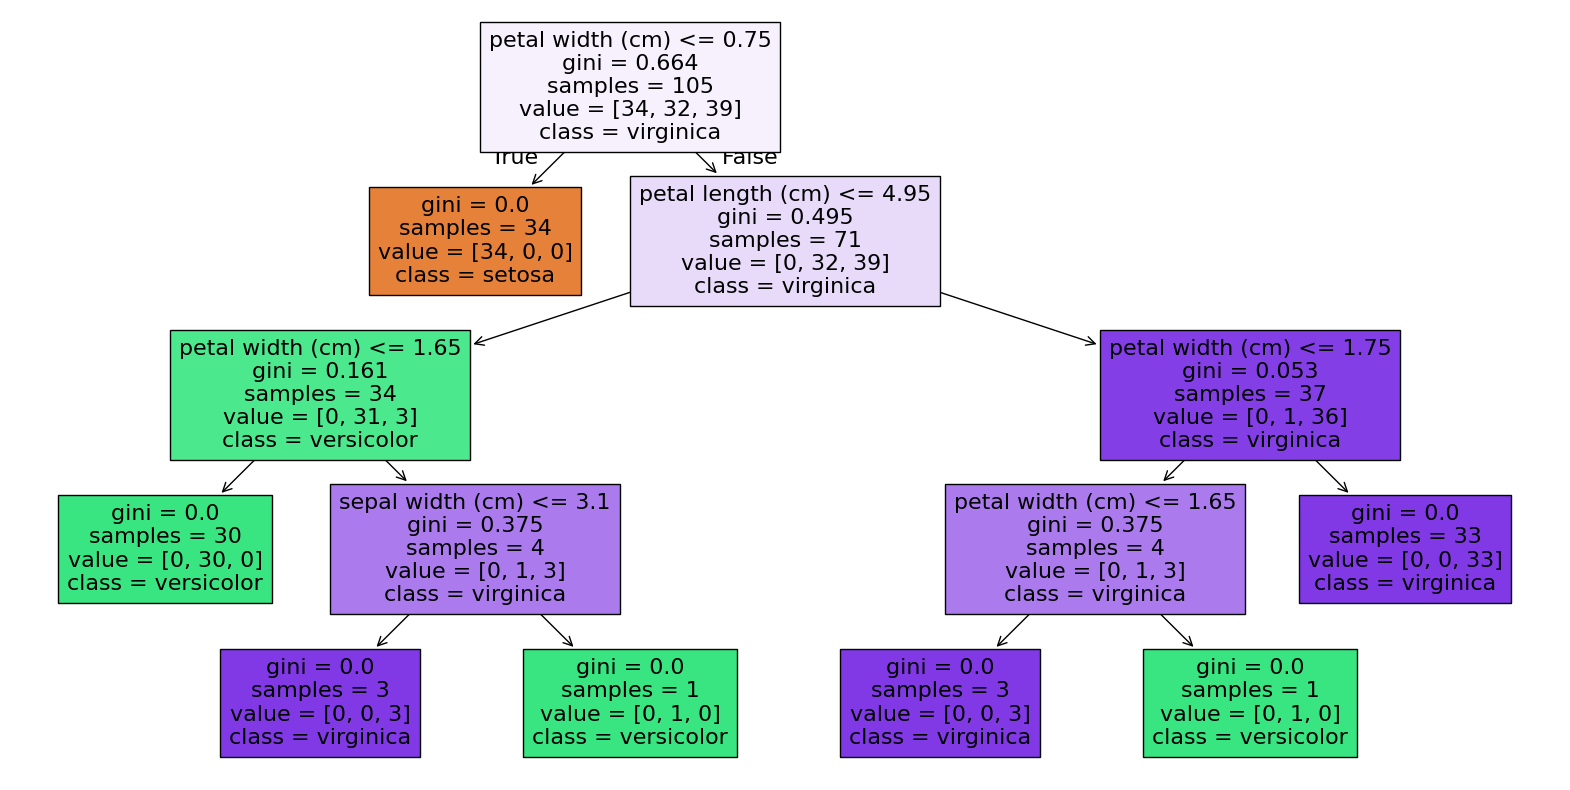

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree using Matplotlib
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=iris.feature_names,
class_names=iris.target_names)
plt.show()